In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import gzip

### Problem 1

In [205]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

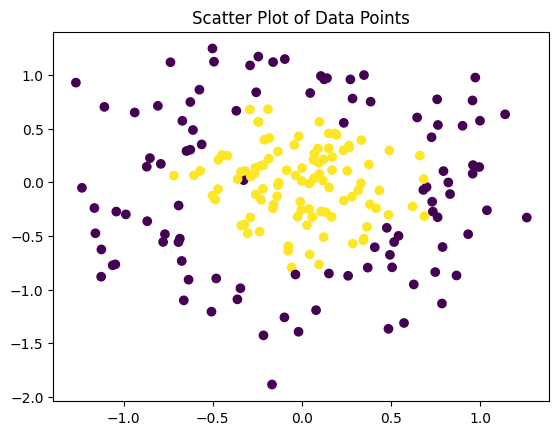

In [28]:
trainX1, trainy1 = make_circles(200, factor=0.3, noise=0.25)
plt.scatter(x = trainX1[:,0], y = trainX1[:,1], c = trainy1)
plt.title("Scatter Plot of Data Points")
plt.show()

In [31]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after training.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Log loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : Instance of LogisticRegressionGD

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()
            loss = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0]
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [58]:
testX1, testy1 = make_circles(200, factor=0.3, noise=0.25)
model1 = LogisticRegressionGD(0.02, 100)
model1.fit(trainX1,trainy1)
predict1 = model1.predict(testX1)
print("Accuracy score of the prediction by logistic regression:", end=" ")
print(accuracy_score(predict1, testy1))

Accuracy score of the logistic regression prediction: 0.535


In [206]:
lr = LogisticRegression()
lrModel = lr.fit(trainX1, trainy1)
predictLR = lrModel.predict(testX1)
print("Accuracy score of the prediction by scikit-learn logistic regression:", end=" ")
print(accuracy_score(predictLR, testy1))

Accuracy score of the prediction by scikit-learn logistic regression: 0.56


In [164]:
svc1 = SVC()
model2 = svc1.fit(trainX1, trainy1)
predict2 = svc1.predict(testX1)
print("Accuracy score of the class prediction by SVM classifier:", end=" ")
print(accuracy_score(predict2, testy1))

Accuracy score of the class prediction by SVM classifier: 0.905


### Problem 2

In [203]:
from sklearn.inspection import DecisionBoundaryDisplay as dbd

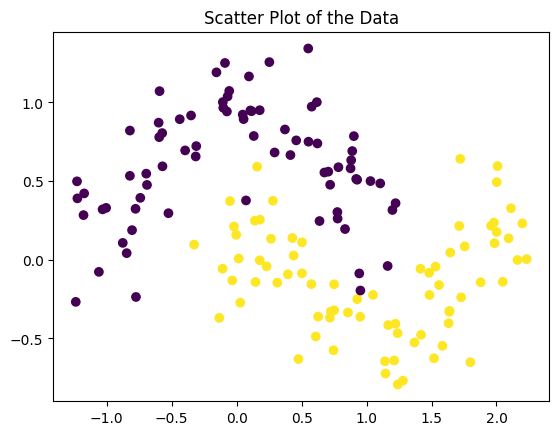

In [202]:
d2 = np.genfromtxt('01-25prob1.csv',delimiter=',')
X2 = d2[:,:2]
y2 = d2[:,2]
plt.scatter(x = X2[:,0], y = X2[:,1], c = y2)
plt.title("Scatter Plot of the Data")
plt.show()

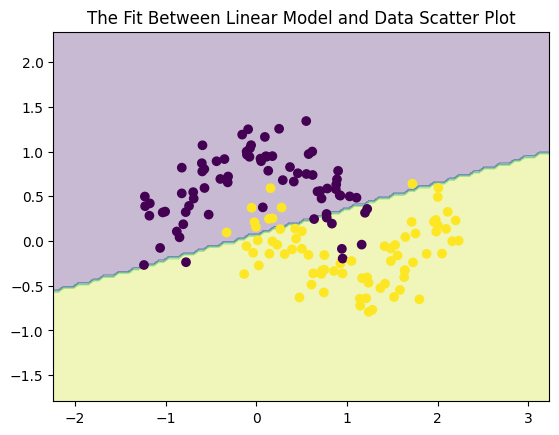

In [208]:
svcLinear = SVC(kernel='linear')
linearModel = svcLinear.fit(X2,y2)
display1 = dbd.from_estimator(linearModel, X2, response_method='predict', alpha=0.3)
plt.scatter(x = X2[:,0], y = X2[:,1], c = y2)
plt.title("The Fit Between Linear Model and Data Scatter Plot")
plt.show()

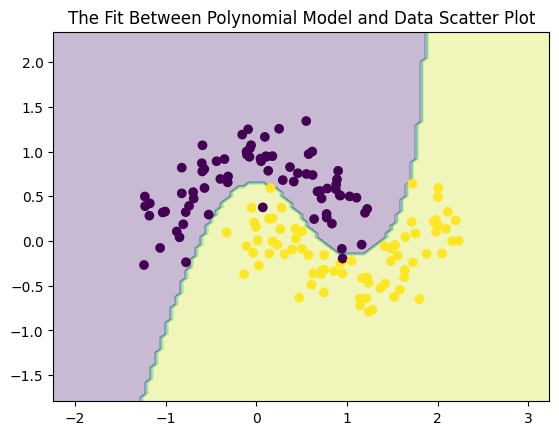

In [220]:
svcPoly = SVC(kernel='poly', degree=4, coef0=6)
polyModel = svcPoly.fit(X2,y2)
display2 = dbd.from_estimator(polyModel, X2, response_method='predict', alpha=0.3)
plt.scatter(x = X2[:,0], y = X2[:,1], c = y2)
plt.title("The Fit Between Polynomial Model and Data Scatter Plot")
plt.show()

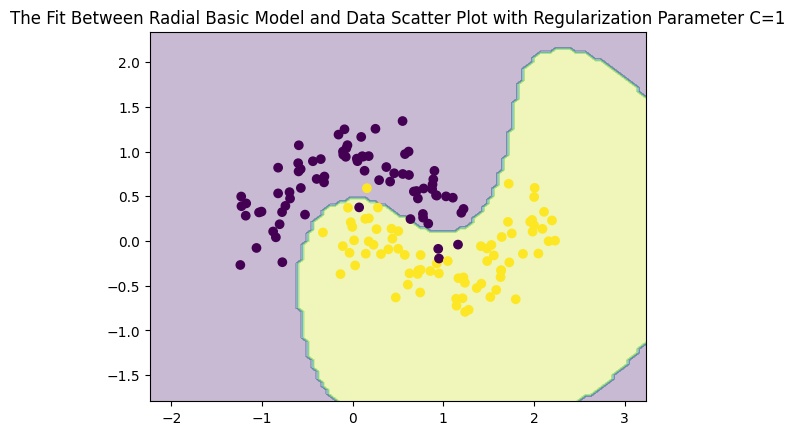

In [226]:
svcRBF1 = SVC(kernel='rbf')
rbfModel1 = svcRBF1.fit(X2,y2)
display3 = dbd.from_estimator(rbfModel1, X2, response_method='predict', alpha=0.3)
plt.scatter(x = X2[:,0], y = X2[:,1], c = y2)
plt.title("The Fit Between Radial Basic Model and Data Scatter Plot with Regularization Parameter C=1")
plt.show()

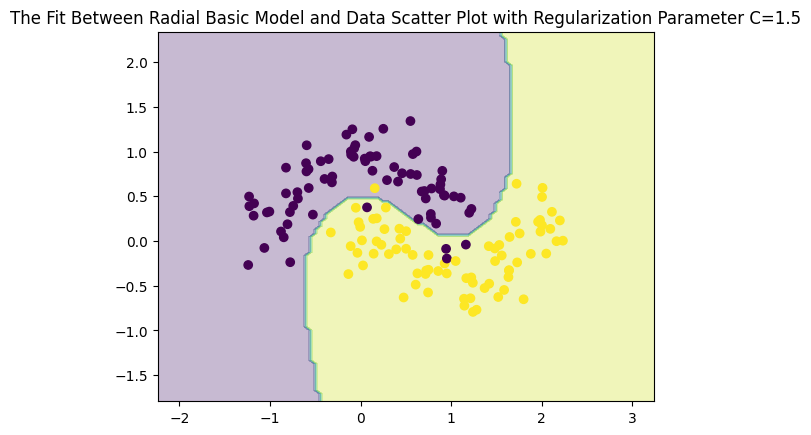

In [241]:
svcRBF2 = SVC(kernel='rbf', C=1.5)
rbfModel2 = svcRBF2.fit(X2,y2)
display4 = dbd.from_estimator(rbfModel2, X2, response_method='predict', alpha=0.3)
plt.scatter(x = X2[:,0], y = X2[:,1], c = y2)
plt.title("The Fit Between Radial Basic Model and Data Scatter Plot with Regularization Parameter C=1.5")
plt.show()

### Problem 3

In [64]:
def load_mnist(path, kind='train'):
    
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [187]:
train_images, train_labels = load_mnist('/Users/macbookpro/JupyterLab/train_data')
#test_images, test_labels = load_mnist('/Users/macbookpro/JupyterLab/test_data', kind='t10k')

In [86]:
train_images.shape

(60000, 784)

In [149]:
train_images.shape

(60000, 784)

In [87]:
train_labels.shape

(60000,)

In [91]:
i1 = train_images[9].reshape(28,28)
l1 = train_labels[9]

The sandal belong to sandal category which is number 5


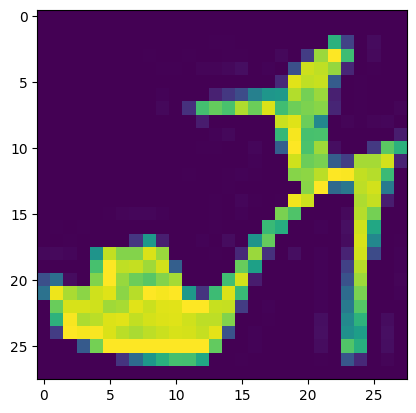

In [100]:
plt.imshow(i1)
print("The sandal belong to sandal category which is number",l1)
plt.show()

In [166]:
image3 = train_images[(train_labels == 6)|(train_labels == 7)]
label3 = train_labels[(train_labels == 6)|(train_labels == 7)]
train3.shape

(12000, 784)

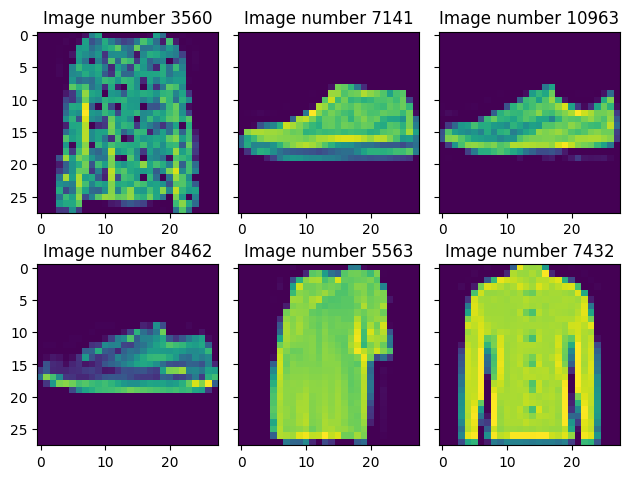

In [201]:
fig, axs = plt.subplots(2, 3, sharey=True, tight_layout=True)
i=0
while i < 6:
    r = np.random.randint(0, 11999)
    image =  train3[r].reshape(28,28)
    axs[i//3,i%3].imshow(image)
    title = "Image number " + str(r)
    axs[i//3,i%3].set_title(title)
    i = i+1
plt.show()

In [165]:
def sample(X, y, n):
    if n > X.shape[0]:
        print("Out Of Bound Error: Invalid sample size n")
    indices = np.random.choice(X.shape[0], size=n, replace=False)
    newX = X[indices, :]
    newY = y[indices]
    return newX, newY

In [170]:
trainX3, trainy3 = sample(image3, label3, 50)
testX3, testy3 = sample(image3, label3, 50)

In [171]:
svc3 = SVC()
model3 = svc3.fit(trainX3, trainy3)
predict3 = svc3.predict(testX3)
print("Accuracy score of the class prediction by SVM classifier:", end=" ")
print(accuracy_score(predict3, testy3))

Accuracy score of the class prediction by SVM classifier: 1.0


In [172]:
def testmodel(X, y, n):
    trainX, trainy = sample(X, y, n)
    testX, testy = sample(X, y, n)
    svc = SVC()
    svcModel = svc.fit(trainX, trainy)
    predict = svc.predict(testX)
    accuracy = accuracy_score(predict, testy)
    print("Accuracy score of the model for size %d: %3.1f" % (n, accuracy))
    return accuracy

**Test Model for Sneakers and Shirt Classification**

In [178]:
testmodel(image3, label3, 100)

Accuracy score of the model for size 100: 1.0


In [181]:
testmodel(image3, label3, 5000)

Accuracy score of the model for size 5000: 1.0


In [183]:
testmodel(image3, label3, 12000)

Accuracy score of the model for size 12000: 1.0


**Test Model for All 10 Categories Classification**

In [186]:
testmodel(train_images, train_labels, 500)

Accuracy score of the model for size 500: 0.8


In [184]:
testmodel(train_images, train_labels, 12000)

Accuracy score of the model for size 12000: 0.9
